# Myopia

* Part 1: Prepare the Data.
* Part 2: Apply Dimensionality Reduction.
* Part 3: Perform a Cluster Analysis with K-means.
* Part 4: Make a Recommendation.

In [66]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split

## Part 1: Prepare the Data

1. Read myopia.csv into a Pandas DataFrame.
2. Remove the "MYOPIC" column from the dataset.
    
    *The target column is needed for supervised machine learning, but it will make an unsupervised model biased. After all, the target column is effectively providing clusters already!*
    
3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [67]:
# Read myopia.csv into a Pandas DataFrame
filepath = Path('./Resources/myopia.csv')
df = pd.read_csv(filepath)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [68]:
# Remove the "MYOPIC" column from the dataset
df1 = df.drop(columns=['MYOPIC'])
df1.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [69]:
# Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)
df_scaled = StandardScaler().fit_transform(df1)

    # Check the dimensions
print('dimension:', df_scaled.shape, ' features')
df_scaled

dimension: (618, 14)  features


array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

## Part 2: Apply Dimensionality Reduction

1. Perform dimensionality reduction with PCA. How did the number of the features change?
2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
3. Create a scatter plot of the t-SNE output. Are there distinct clusters?

*Hint: Rather than specify the number of principal components when you instantiate the PCA model, state the desired explained variance. For example, say that a dataset has 100 features. Using PCA(n_components=0.99) creates a model that will preserve approximately 99% of the explained variance, whether that means reducing the dataset to 80 principal components or 3.*

*For this assignment, preserve `90%` of the explained variance in dimensionality reduction.*

In [70]:
# Perform dimensionality reduction with PCA. 
from sklearn.decomposition import PCA

    # initialise PCA model preserving 90% of the explained variance in dimensionality reduction
    # Get prinicipal components for the data
pca = PCA(n_components = 0.90)
pca_fit = pca.fit_transform(df_scaled)

    # Check the dimensions
print('dimension: ', pca_fit.shape, ' features')

dimension:  (618, 10)  features


#### *How did the number of the features change?*
The number of features reduced by 4, from 14 to 10 features.

In [71]:
    # Transform PCA data to a DataFrame
pca_df = pd.DataFrame(
    data = pca_fit, 
    columns = [
        "principal component 1", 
        "principal component 2",
        "principal component 3",
        "principal component 4",
        "principal component 5",
        "principal component 6",
        "principal component 7",
        "principal component 8",
        "principal component 9",
        "principal component 10"
        ])

    # Fetch the explained variance
print('explained variance: ', pca.explained_variance_ratio_)

pca_df.head()

explained variance:  [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


#### *Analaysis*
According to the explained variance, the:
1. first principal component contains approximately `21%` of the variance,
2. second principal component contains approximately `16%` of the variance,
3. third principal component contains approximately `9%` of the variance,
4. fourth principal component contains approximately `8%` of the variance,
5. fifth principal component contains approximately `8%` of the variance,
6. sixth principal component contains approximately `7%` of the variance,
7. seventh principal component contains approximately `6%` of the variance,
8. eighth principal component contains approximately `6%` of the variance,
9. ninth principal component contains approximately `5%` of the variance,
10. tenth principal component contains approximately `5%` of the variance.

We have approximately `91%` of the information in the original dataset, and we will see whether increasing the number of principal components to 3 will increase the explained variance.

In [72]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
# To do this, run t-SNE on the principal components, which is the output of the PCA transformation.
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(pca_fit)

# Check that dimensions have been reduced to two
print('dimension: ', tsne_features.shape, ' features')

/Users/gracecheuk/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


dimension:  (618, 2)  features


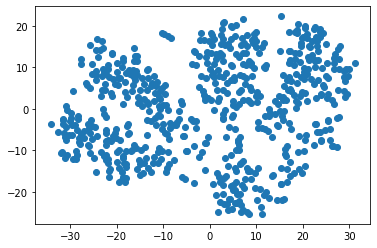

In [73]:
# Create a scatter plot of the t-SNE output. 
import matplotlib.pyplot as plt

plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

0    537
1     81
Name: MYOPIC, dtype: int64


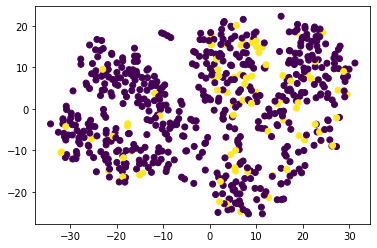

In [74]:
# create labels from inital dataframe
labels = df['MYOPIC']

# Count values Myopic (1) and non-Myopic(0)
print(labels.value_counts())

# plot colour plot
plt.scatter(tsne_features[:,0], tsne_features[:,1], c = labels)
plt.show()

#### *Are there distinct clusters?*
No, there aren't any distinct clusters. Both colours overlap and do not separate into exclusive coloured clusters.

## Part 3: Perform a Cluster Analysis with K-Means

Create an elbow plot to identify the best number of clusters. Make sure to do the following:

* Use a `for` loop to determine the inertia for each `k` between 1 through 10.

* If possible, determine where the elbow of the plot is, and at which value of `k` it appears.

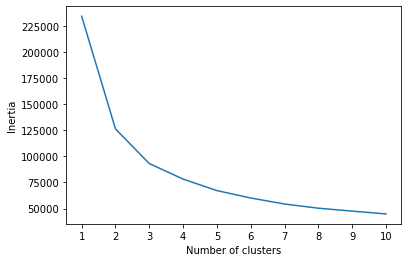

In [75]:
from sklearn.cluster import KMeans

inertia = []
# k = [1,2,3,4,5,6,7,8,9,10]
# k = range(1, 11)
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df1)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create an elbow plot
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### *Where is the elbow of the plot, and at which value of `k` it appears.*
The elbow seems most visible at `k = 3`

## Part 4: Make a Recommendation

Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

In [77]:
# 3 prinicipal components for the data 
df2 = pd.DataFrame(
    tsne_features, 
    columns = [
        "principal component 1", 
        "principal component 2"
    ])
df2.head()

,principal component 1,principal component 2
0,29.521240,3.525527
1,0.638256,8.765724
2,-16.773706,4.444427
3,-17.634027,-3.558617
4,18.577023,1.954027


In [83]:
# Initialize the K-Means model
model = KMeans(n_clusters = 3, random_state = 42)

# Train the model
model.fit(df2)

# Predict clusters
pred = model.predict(df2)

# Create return DataFrame with predicted clusters
df2["group"] = model.labels_
df2.head()

,principal component 1,principal component 2,group
0,29.521240,3.525527,1
1,0.638256,8.765724,1
2,-16.773706,4.444427,2
3,-17.634027,-3.558617,2
4,18.577023,1.954027,1


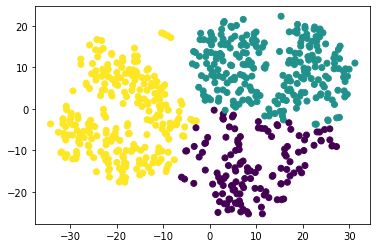

In [84]:
# plot colour plot
plt.scatter(
    df2['principal component 1'], 
    df2['principal component 2'], 
    c = df2['group']
    )
plt.show()

#### *Can the patients be clustered? If so, into how many clusters?*
According to findings, customers CAN be clustered into 3 groups. It is evident that in the last scatter plot, there are 3 distinct different coloured clusters.